#1 MUSHROOMS: El siguiente dataset buscar a ayudar a identificar hongos comestibles relacionados al consumo más allá de su potencial comercialización, con lo cual apunta a aquellas personas que gustan de pasar tiempo en la naturaleza y poder hacerlo sin incurrir en peligros innecesarios. El dataset cuenta con un detalle de características por cada tipo de hongo y su clasificación como comestible, venenoso o en sin confirmar, pero se los consideran igual que los venenosos.
Los hongos son un reino de seres vivos unicelulares o pluricelulares que no forman tejidos y cuyas células se agrupan formando un cuerpo filamentoso muy ramificado.
El hongo, además de tener un sitio para su desarrollo, obtiene de la planta hidratos de carbono, vitaminas y agua. A cambio, el hongo le proporciona a la planta minerales y otros beneficios como pueden ser la protección contra organismos parásitos del suelo y resistencia a la sequía.
Desde la antigüedad los hongos han sido utilizados para distintos propósitos según las siguientes características:

-	Hongos ornamentales: debido a su belleza muchos se han usado con un fin estético y ornamental, incluyéndoselos en ofrendas que, acompañados con flores y ramas, son ofrecidas en diversas ceremonias.

-	Hongos alimenticios: es uno de los principales empleos de los hongos, siendo los más conocidos el Agaricus campestris y el A. bisporus, comúnmente conocidos como “champiñones” u “hongos de París”; la importancia de éstos se debe a que son de las pocas especies que pueden cultivarse artificialmente y de manera industrial.

-	Hongos enteógenos (alucinógenos): han sido utilizados últimamente por la industria farmacéutica para la extracción de productos con fines psicoterapéuticos (psilocibinas y psilocinas)

-	Hongos medicinales: con el descubrimiento de la penicilina, por parte de Fleming, como un metabolito del mecanismo antagónico que tienen los hongos contra otros microorganismos, se ha desarrollado una gran industria para el descubrimiento, separación y comercialización de nuevos antibióticos.

Tomando en cuenta que el dataset clasifica hongos como comestibles o venenosos, la potencialidad del dataset consiste en poder determinar de la mejor manera nuevos hongos que puedan ser consumidos en el futuro o bien al tener determinadas características de un hongo llegar a tener un grado de certeza del 100% si son o no comestibles.

Entonces, con las características mencionadas más arriba podemos intentar responder las siguientes preguntas:

-	¿El dataset tiene algún sesgo que pueda llegar a influenciar el análisis?

-	¿Existe alguna característica unívoca que identifique a un hongo como comestible o no?

-	¿Existe algún tipo de correlación entre las distintas características de las dos clases de hongos?

Por último, se agregan las características y el glosario que permiten entender mejor el dataset: 

Como se ve más abajo cuenta con 23 columnas y 8124 filas. No hay valores nulos.

Agrego el glosario para un mejor entendimiento de las variables y atributos de cada una:

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


A continuación mostramos una ilustración de las partes del hongo para un mejor entendimiento del presente análisis


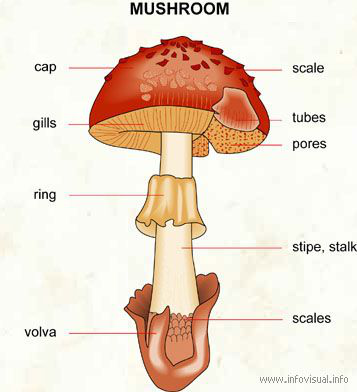

In [7]:
from PIL import Image
i = Image.open('Mushroom pic1.jpg')
print("A continuación mostramos una ilustración de las partes del hongo para un mejor entendimiento del presente análisis")
i

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv("mushrooms.csv")

df['class'].unique()

for column in df.columns:
  print(column, df[column].unique())

df.head(5).round(1)

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


columna = 'class'
class = [comestibles, venenosos]
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(class, labels = cars,)

Habiendo analizado el contexto y planteado las hipótesis, procedemos al análisis exploratorio de datos.

# Análsis exploratorio de datos

# Sesgo del listado

Con el gráfico a continuación vamos a analilzar la variable principal (columna Class), ya que la intención del dataset es poder indicar según determinadas características si un hongo es o no venenoso.

e    4208
p    3916
Name: class, dtype: int64

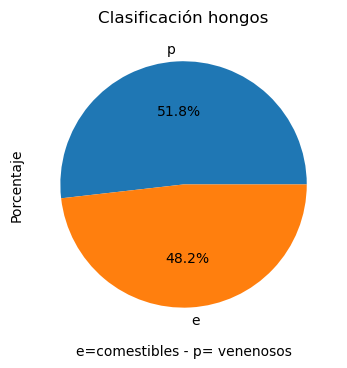

In [2]:
fig, ax = plt.subplots(figsize=(4, 4))
df.index=df['class']
df['class'].value_counts().plot(kind="pie", fontsize = 10, labels = df.index,autopct='%1.1f%%' )
ax.set_title('Clasificación hongos')
ax.set_xlabel('e=comestibles - p= venenosos')
ax.set_ylabel('Porcentaje')
df['class'].value_counts()

Como se puede observar el dataset no está sesgado, ya que prácticamente hay la misma cantidad de hongos comestibles como de hongos venenosos.

# Búsqueda de características únicas a través de gráficos univariados.

En el gráfico más abajo y habiendo revisado el dataset, la intención es cerciorarnos que la característica de "Veil-type" está presente en los hongos comestibles y no comestibles, sin existir otra característica adicional.

Text(0, 0.5, 'Cantidad')

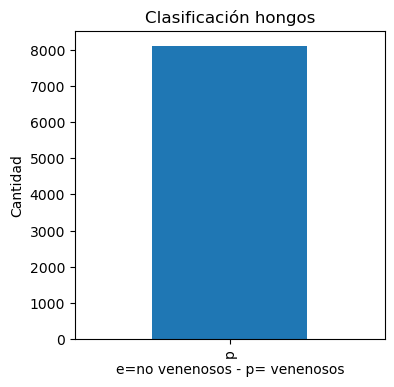

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
df['veil-type'].value_counts().plot(kind="bar", fontsize = 10, )
ax.set_title('Clasificación hongos')
ax.set_xlabel('e=no venenosos - p= venenosos')
ax.set_ylabel('Cantidad')

Con este gráfico podemos demostrar que la columna Veil-type se puede omitir más adelante en el análisis y armado del algoritmo, ya que no aporta al análisis para saber si un hongo puede o no ser comestible.

# Comparativa de distintas características en relación a la variable principal
Más abajo generamos dos subgrupos, uno relacionado a hongos comestibles y otro relacionado a hongos venenosos.
La idea es poder analizar las demás características y ver si alguna prevalece sobre otra en relación a la variable principal.

In [4]:
comestibles=df[df["class"]=="e"]
venenosos=df[df["class"]=="p"]
x = comestibles["bruises"]
y = venenosos["bruises"]
g= [x,y]
w= y.value_counts()
print(comestibles)
print (venenosos)
print (x)
print (y)
print(g)
w

      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
class                                                                      
e         e         x           s         y       t    a               f   
e         e         b           s         w       t    l               f   
e         e         x           s         g       f    n               f   
e         e         x           y         y       t    a               f   
e         e         b           s         w       t    a               f   
...     ...       ...         ...       ...     ...  ...             ...   
e         e         x           s         n       f    n               a   
e         e         k           s         n       f    n               a   
e         e         x           s         n       f    n               a   
e         e         f           s         n       f    n               a   
e         e         x           s         n       f    n               a   

      gill-

f    3292
t     624
Name: bruises, dtype: int64

Text(0, 0.5, 'Cantidad')

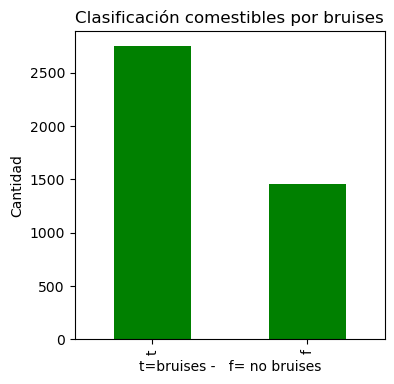

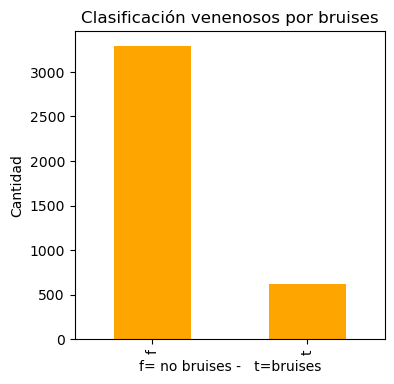

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))
plot1=x.value_counts().plot(kind="bar", fontsize = 10, color="green" )
ax.set_title('Clasificación comestibles por bruises')
ax.set_xlabel('t=bruises -   f= no bruises')
ax.set_ylabel('Cantidad')
fig, ax1 = plt.subplots(figsize=(4, 4))
plot2=y.value_counts().plot(kind="bar", fontsize = 10, color="orange")
ax1.set_title('Clasificación venenosos por bruises')
ax1.set_xlabel('f= no bruises -   t=bruises')
ax1.set_ylabel('Cantidad')


En relación a los Bruises (o moretones) podemos observar que la presencia de bruises es mayor en hongos comestibles. Con lo cual, su ausencia es un fuerte indicador de que sea venenoso.

# Reemplazo de valores ?
Revisando el dataset he observado que la columna stalk-root tiene valores "?"
Se tomo la determinación de reemplazarlo por el valor que más se repite.

In [6]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [7]:
data = df.replace("?", np.nan)
data.loc[:,"stalk-root"]
imputer = SimpleImputer(missing_values=np.NaN,strategy ="most_frequent")
data['stalk-root']=imputer.fit_transform(data['stalk-root'].values.reshape(-1, 1))
data.loc[:,"stalk-root"]

class
p    e
e    c
e    c
p    e
e    e
    ..
e    b
e    b
e    b
p    b
e    b
Name: stalk-root, Length: 8124, dtype: object

# Graficando con Seaborn
A continuación procedemos a realizar gráficos bivariados con seaborn para continuar con el análisis.

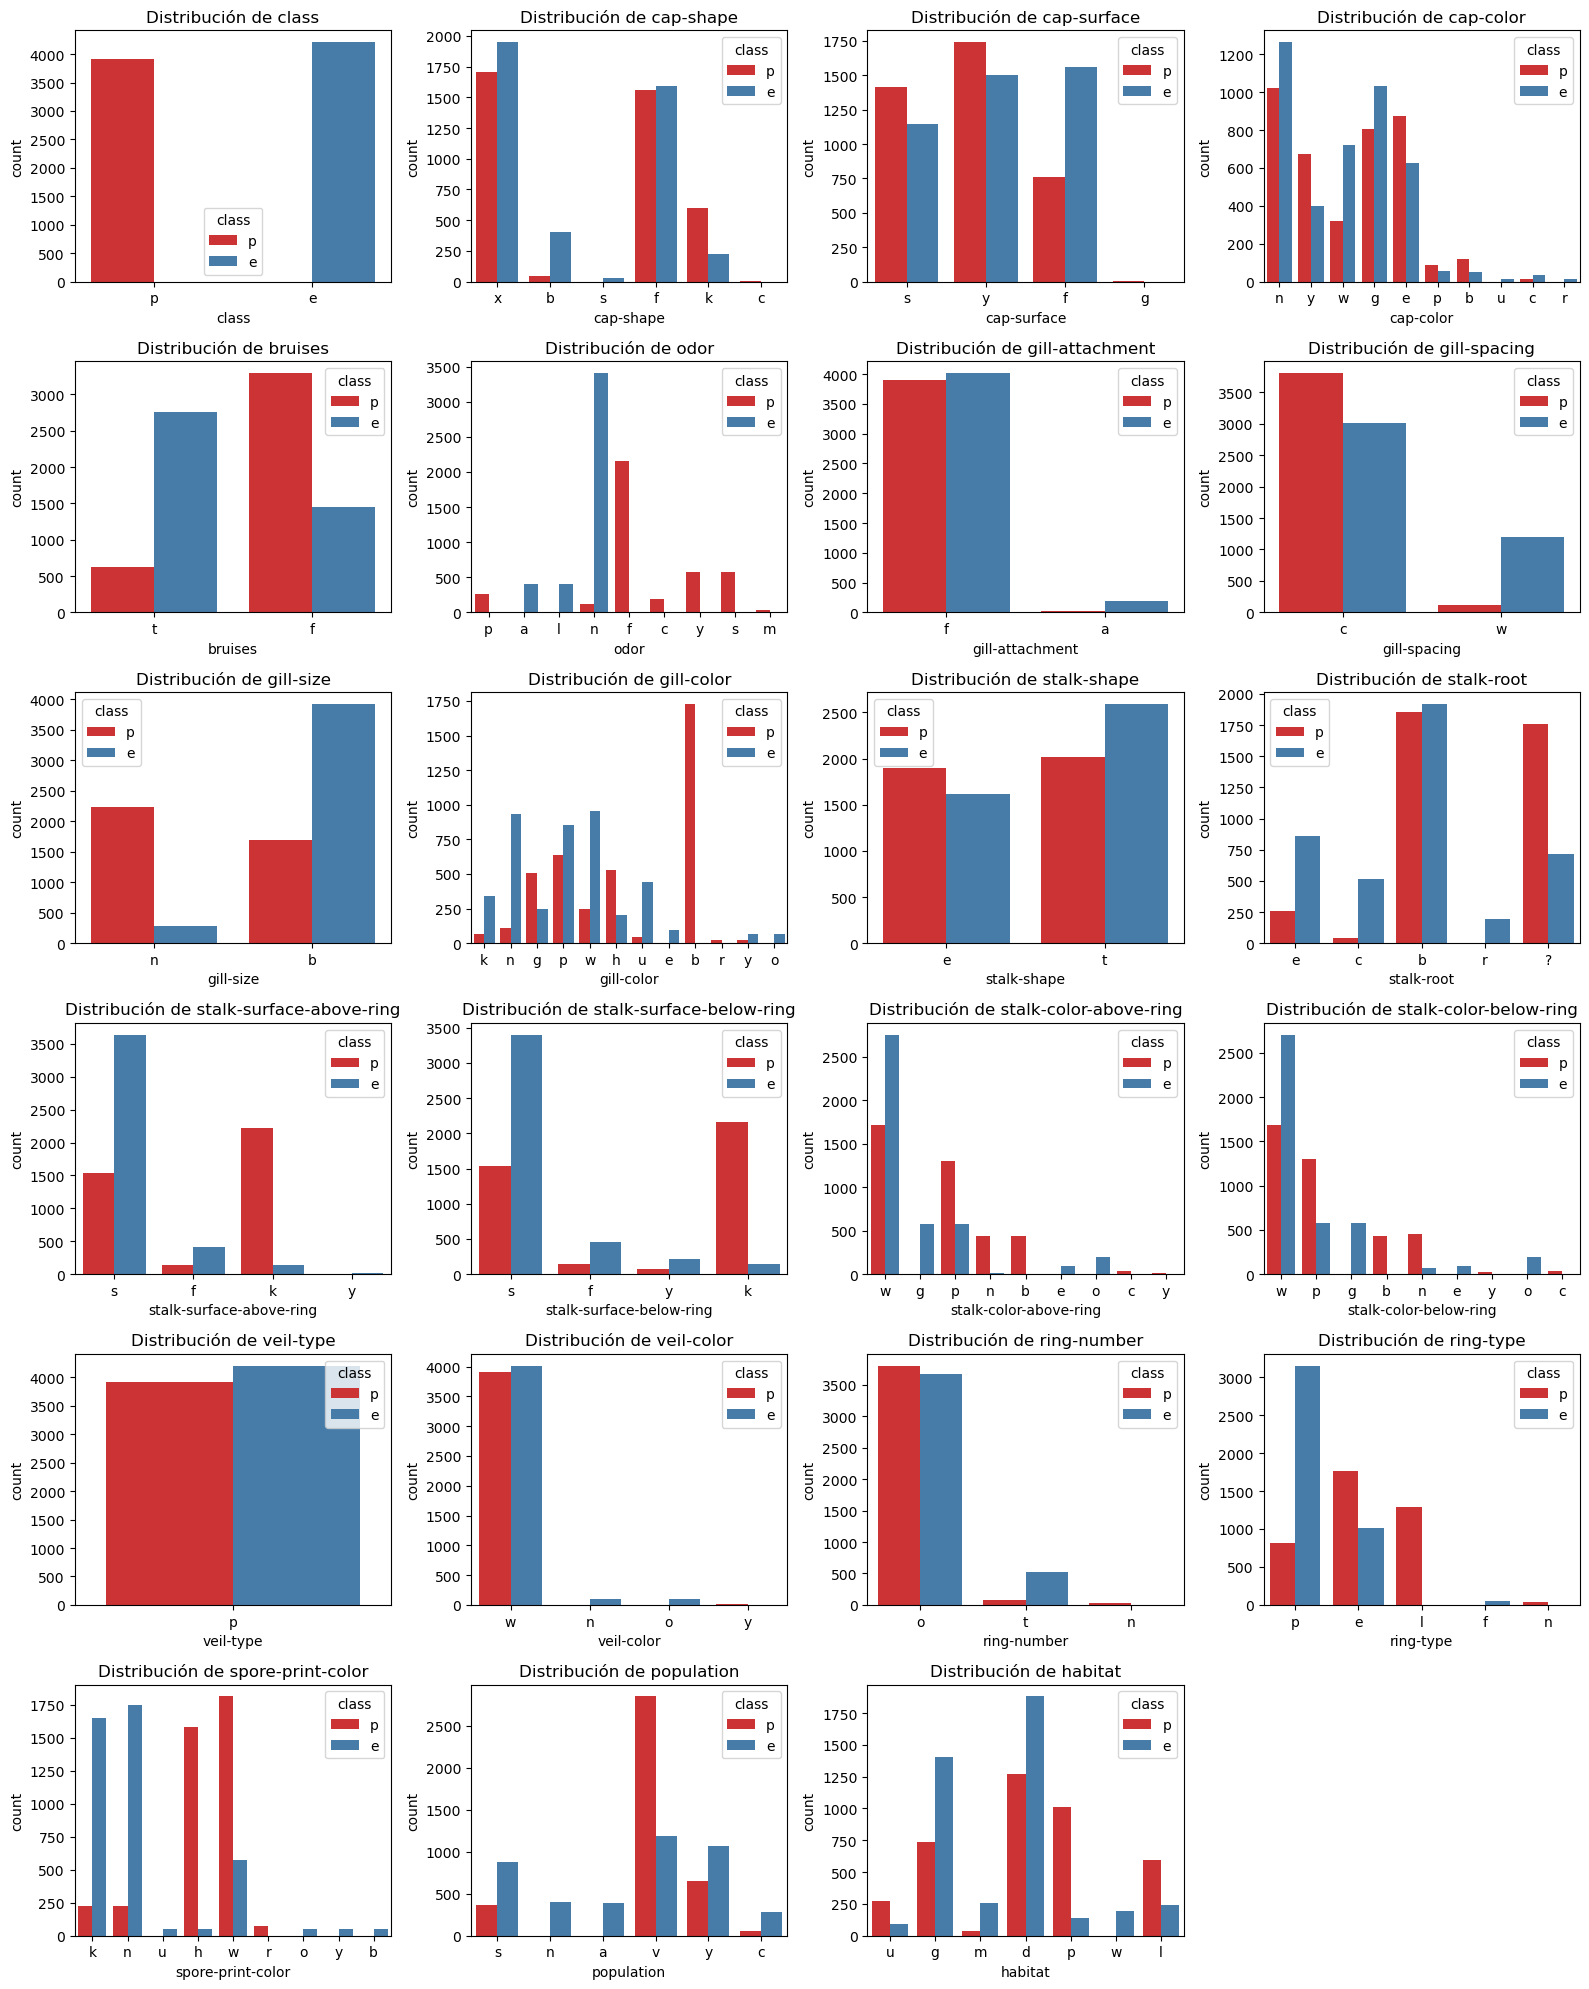

In [8]:
features = df.columns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 20))

for feature, ax in zip(features, axes.flatten()):    
    sns.countplot(x=feature, hue='class', data=df, ax=ax, palette="Set1", linewidth=0)
    ax.set_title(f"Distribución de {feature}")
    #ax.get_legend().remove()

# Remove any unused subplots
for remaining_ax in axes.flatten()[len(features):]:
    remaining_ax.remove()

plt.tight_layout()
plt.show()



Teniendo todos los gráficos donde relacionamos las características según si se encuentran en hongos venenosos o comestibles, podemos llegar a algunas de las siguientes conclusiones:

- Respecto a cap-shape, cap-surface, cap-color, girll-attachment, stalk-shape, ring-number, veil-color, stalk-root, veil-color, ring-number, population, habitat, es difícil encontrar una característica que destaque en la diferenciación de hongos venenosos y comestibles.
- Respecto a Bruises, si el hongo tiene bruises es más probable que sea comestible.
- Respecto al Odor, si no tiene olor es muy probable que sea comestible, lo mismo si tiene olor a almendra o anís. Mientras que si tiene un olor desagradable o a pescado o picante es venenoso.
- Respecto a gill-spacing, si están amontonadas es más probable que sean comestibles.
- Respecto a gill-color, si es color es beige son venenosos.
- Respecto a veil-type, puede ser omitida en el análisis posterior, ya que es una solo característica que se repite para los hongos venenosos y comestibles.
- Respecto a Stalk-surface-above-ring y a Stalk-surface-below-ring, si son sedosas es más probable que sean venenosos.
- Respecto a stalk-color-above-ring, si el color es gris, rojo o naranja, son comestibles.
- Respecto a stalk-color-below-ring, si son beige o marrón, son venenosos.
- Respecto a ring-type, si son largos son venenosos.
- Respecto a spore-print-color, si son blancos o color chocolate es más probable que sean venenosos, mientras que si son negros o marrones son comestibles.

# Feature selection

Este dataset está basado en variables categóricas por lo cual vamos a realizar el feature selection utilizando el método de Fisher Score/Chi Square, el cual mide la dependencia entre 2 variables categóricas.

Debido a que es un dataset mediano, vamos a analizar el modelo tomando todas las variables y luego prodeceremos a analizarlo tomando las variables más representativas.

- Todas las variables

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
df = pd.get_dummies(df,drop_first=True)
X = df.drop('class_p',axis=1)
y = df['class_p']
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
# Creamos un modelo Random Forest con parametros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

<Figure size 1000x600 with 0 Axes>

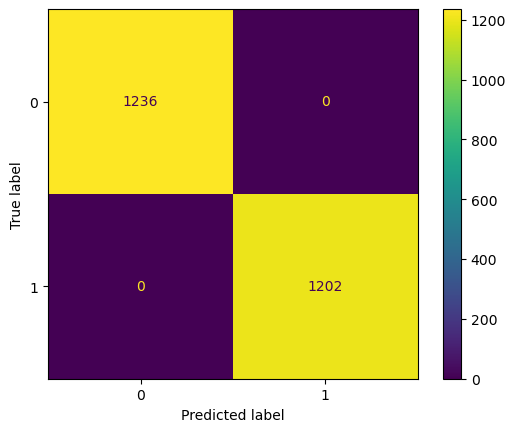

In [10]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, preds, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
disp.plot()

plt.show()

In [11]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([1236,    0,    0, 1202], dtype=int64)

In [12]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Se puede observar que el modelo armado nos da un 100% de certeza. Vamos a verificar el modelo tomando las variables más significativas.

# Análisis CHI2

Para este análisis hemos considerado que la selección se restringa a 8 variables significativas y luego hemos comparado las métricas correspondientes.

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

uni = SelectKBest(score_func = chi2, k = 8)
fit = uni.fit(X, y)

In [14]:
X.columns[fit.get_support(indices=True)].tolist()

['odor_f',
 'odor_n',
 'gill-size_n',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k',
 'ring-type_l',
 'ring-type_p',
 'spore-print-color_h']

In [91]:
X2 = df[['odor_f','odor_n','gill-size_n','stalk-surface-above-ring_k','stalk-surface-below-ring_k','ring-type_l','ring-type_p','spore-print-color_h']]
y2 = df['class_p']
# Separamos en entrenamiento/test en razon 70/30 %
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=1)
# Creamos un modelo Random Forest con parametros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X2_test)

<Figure size 1000x600 with 0 Axes>

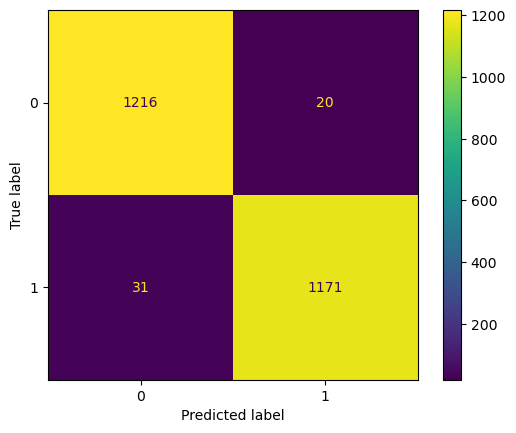

In [16]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, preds, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
disp.plot()

plt.show()

In [99]:
print(metrics.classification_report(y2_test, preds))
print('Validation Accuracy : ',
      metrics.accuracy_score(y2_train,
                             modelo.predict(X2_train))*100)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1236
           1       0.98      0.97      0.98      1202

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Validation Accuracy :  97.66092156173056


# Conclusiones preliminares de Feature selection y sus métricas

El modelo armado tomando 8 variables principales nos deja una precisión del 98% en relación al 100% si tomamos todas las variables, con lo cual, se lo puedo considerar un buen modelo para un árbol de decisiones.

Para las conclusiones y recomendaciones finales, entonces nos centraremos en las siguientes características en base al modelo:

-  odor_f,odor_n

- gill-size_n

- stalk-surface-above-ring_k

- stalk-surface-below-ring_k

- ring-type_l,ring-type_p

- spore-print-color_h



Habiendo seleccionado 8 variables principales procedemos a analizar su resultado con distintos modelos:
- Random Forest (analizado más arriba)
- KNN
- Decisition Tree Classifier
- GaussianNB
- SVC
- LINEAR DISCRIMINANT ANALYSIS (LDA)

# KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [101]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
predsknn = knn.predict(X2_test)


<Figure size 1000x600 with 0 Axes>

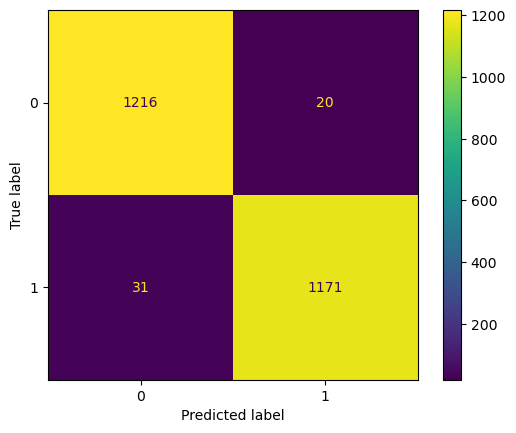

In [102]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, predsknn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()

plt.show()

In [103]:
print(metrics.classification_report(y2_test, predsknn))
print('Validation Accuracy : ',
      metrics.accuracy_score(y2_train,
                             modelo.predict(X2_train))*100)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1236
           1       0.98      0.97      0.98      1202

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Validation Accuracy :  97.66092156173056


# Decisition Tree Classifier

In [104]:
dt=DecisionTreeClassifier()
dt.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
predsDTC = dt.predict(X2_test)

<Figure size 1000x600 with 0 Axes>

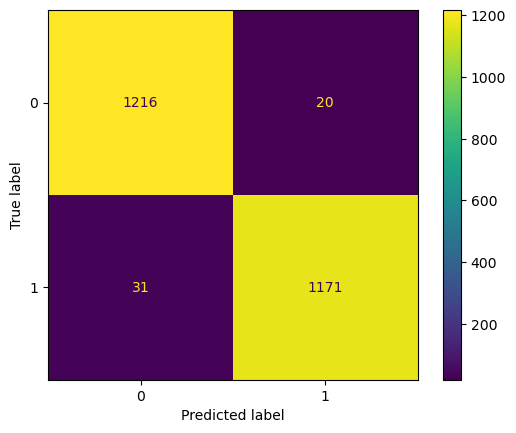

In [105]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, predsDTC, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()

plt.show()

In [106]:
print(metrics.classification_report(y2_test, predsDTC))
print('Validation Accuracy : ',
      metrics.accuracy_score(y2_train,
                             modelo.predict(X2_train))*100)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1236
           1       0.98      0.97      0.98      1202

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Validation Accuracy :  97.66092156173056


# GaussianNB

In [107]:
g=GaussianNB()
g.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
predsG = g.predict(X2_test)

<Figure size 1000x600 with 0 Axes>

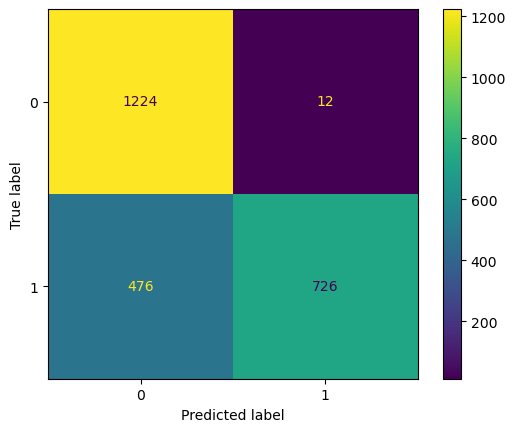

In [108]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, predsG, labels=g.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=g.classes_)
disp.plot()

plt.show()

In [109]:
print(metrics.classification_report(y2_test, predsG))
print('Validation Accuracy : ',
      metrics.accuracy_score(y2_train,
                             modelo.predict(X2_train))*100)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      1236
           1       0.98      0.60      0.75      1202

    accuracy                           0.80      2438
   macro avg       0.85      0.80      0.79      2438
weighted avg       0.85      0.80      0.79      2438

Validation Accuracy :  97.66092156173056


# SVC

In [110]:
SVC=SVC()
SVC.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
predsSVC = SVC.predict(X2_test)

<Figure size 1000x600 with 0 Axes>

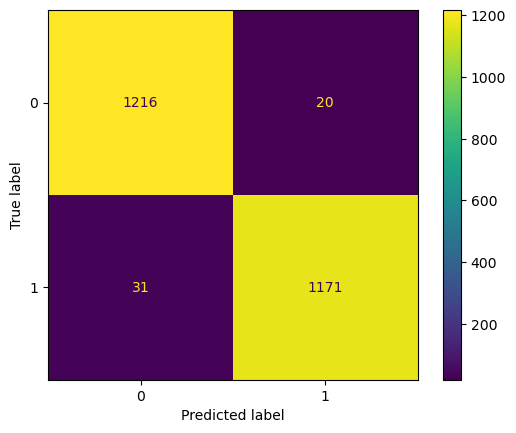

In [111]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, predsSVC, labels=SVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVC.classes_)
disp.plot()

plt.show()

In [112]:
print(metrics.classification_report(y2_test, predsSVC))
print('Validation Accuracy : ',
      metrics.accuracy_score(y2_train,
                             modelo.predict(X2_train))*100)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1236
           1       0.98      0.97      0.98      1202

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Validation Accuracy :  97.66092156173056


# LDA

In [113]:
LDA=LinearDiscriminantAnalysis()
LDA.fit(X2_train, y2_train)
# Obtenemos las predicciones del modelo con X_test
predsLDA = LDA.predict(X2_test)

<Figure size 1000x600 with 0 Axes>

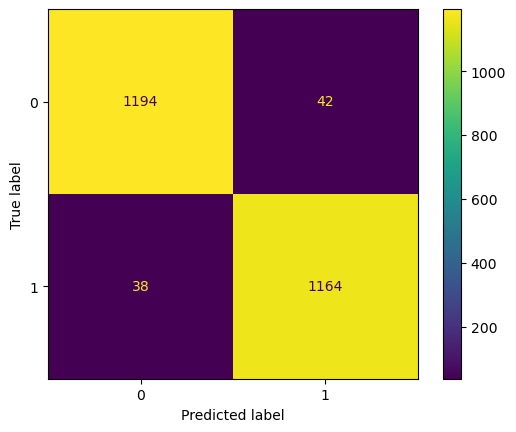

In [114]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, predsLDA, labels=LDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=LDA.classes_)
disp.plot()

plt.show()

In [115]:
print(metrics.classification_report(y2_test, predsLDA))
print('Validation Accuracy : ',
      metrics.accuracy_score(y2_train,
                             modelo.predict(X2_train))*100)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1236
           1       0.97      0.97      0.97      1202

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438

Validation Accuracy :  97.66092156173056


# Comparación entre los distintos modelos

A continuación observaremos una comparación entre los distintos modelos y analizar su validación.

In [116]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
accuracyRF = round(accuracy_score(y2_test, preds)*100,ndigits=2)
f1ScoreRF = round(f1_score(y2_test, preds)*100,ndigits=2)
accuracyKNN = round(accuracy_score(y2_test, predsknn)*100,ndigits=2)
f1ScoreKNN = round(f1_score(y2_test, predsknn)*100,ndigits=2)
accuracyDTC = round(accuracy_score(y2_test, predsDTC)*100,ndigits=2)
f1ScoreDTC = round(f1_score(y2_test, predsDTC)*100, ndigits=2)
accuracyG = round(accuracy_score(y2_test, predsG)*100, ndigits=2)
f1ScoreG = round(f1_score(y2_test, predsG)*100, ndigits=2)
accuracySVC = round(accuracy_score(y2_test, predsSVC)*100, ndigits=2)
f1ScoreSVC = round(f1_score(y2_test, predsSVC)*100, ndigits=2)
accuracyLDA = round(accuracy_score(y2_test, predsLDA)*100, ndigits=2)
f1ScoreLDA = round(f1_score(y2_test, predsLDA)*100, ndigits=2)

Models_Scores = pd.DataFrame({'Models':['RF','KNN','Decision Tree','Bayesian Classifier','SVC','LDA'],
                              'Accuracy':[accuracyRF,accuracyKNN,accuracyDTC,accuracyG,accuracySVC,accuracyLDA],
                            'Fscore': [f1ScoreRF,f1ScoreKNN,f1ScoreDTC,f1ScoreG,f1ScoreSVC,f1ScoreLDA]})

Models_Scores


,Models,Accuracy,Fscore
0,RF,97.91,97.87
1,KNN,97.91,97.87
2,Decision Tree,97.91,97.87
3,Bayesian Classifier,79.98,74.85
4,SVC,97.91,97.87
5,LDA,96.72,96.68


# Conclusiones preliminares de los modelos utilizados

Salvo el modelo de Bayesian Classifier, el resto de los modelos utilizados nos otorgan un porcentaje de certeza de al menos un 96%. Por otro lado, hemos verificado el % de certeza del traning supera el 97%. Con lo cual, podemos concluir que nuestros modelos no estarían en overfitting.

A su vez, hemos logrado considerar sólo 8 de las 23 variables, lo cual hace más eficientes nuestros análisis.

Por último, pasamos a las conclusiones y recomendaciones finales.

# Conclusiones y recomendaciones finales

Según las preguntas que nos hicimos más al principio podemos llegar a las siguientes conclusiones preliminares para cada una.

1)	¿El dataset tiene algún sesgo que pueda llegar a influenciar el análisis?

Pudimos verificar que no hay sesgo en el universo analizado.

2)	¿Existe alguna característica unívoca que identifique a un hongo como comestible o no?

No hay una característica única, no obstante, pudimos eliminar una columna "veil-type", ya que no aporta en saber si un hongo es comestible o no.

3)	¿Existe algún tipo de correlación entre las distintas características de las dos clases de hongos?

Analizamos las 8 variables más significativas y pudimos identificar combinaciones que ayudan a saber si un hongo puede ser o no venenoso.

Luego de todo lo analizados podemos llegar a las siguientes recomendaciones a la hora de seleccionar un hongo para su consumo:

 1. Verificar que el stalk-surface-above-ring y stalk-surface-below-ring no sea sedosa (silky)puesto que si es así, es un fuerte indicador de que es venesoso.
 
 2. Verificar que no tenga olor o a lo sumo olor a tierra, de lo contrario descartarlo.
 
 3. Verificar que el spore-print-color no sea color chocolate, ya que es venenoso. Debería ser negro o marrón para que sea comestible.
 
 4. Verificar que el ring-type sea pendant (colgante).
 
 5. Verificar que el gill-size sea amplio y el spore-print-color sea marrón (n), ya que seguramente sean comestibles.
 
 6. Tomar en cuenta los tipos de hongos comestibles más conocidos como el champiñón y portobello (Agaricus), el seta (Pleurotus), el hongo blanco, el shiitake (Lentinula) y el cuitlacoche (Ustilago). Siempre verificando lo indicado en el punto 2 respecto al olor.
 
 Por último, más allá de poder identificar hongos con las caraterísticas indicadas más arriba, siempre efectuar su consumo en un ambiente controlado, ya que por más que sean comestibles, algunos hongos tienen efectos alucinógenos.